# Heuristics

##### Tyler Falcoff 10/9/2016

Let's explore why numbers are important for a business.

Given that you're in a meeting, and you're the only data-head in the bunch, why should the VP and all his merry men listen to you?

There are many situations where this might be the case.

Just a few examples of where this is definitely true:
 1. Portfolio Investments
 2. Project Budgeting
 3. Third Party Management
  
Here are some reasons they should listen to your numbers...

### Portfolio Investments

Decision making plays a large role in the stock markets with heuristics as a main driving factor. Ever heard the phrase _buy low, sell high_? Its purpose is to convince you not to give into your emotions when playing high risk games. The market will dip, spike and throw your money around, so while it's tempting to listen to the butterflies in your stomach, risk is one big reason why you should not...

First let's take look at the [Consumer Sentiment Index](http://www.sca.isr.umich.edu). This is a fortunate source because it quantifies a heurestical perspective of our economy. A lot of times we will have to install our own measurements, which would not come anywhere near such well established survey.

We will be cross referencing this with an actual measure, the Dow Jones Industrial Average, thereby treating it as a projection plan of the stock market.

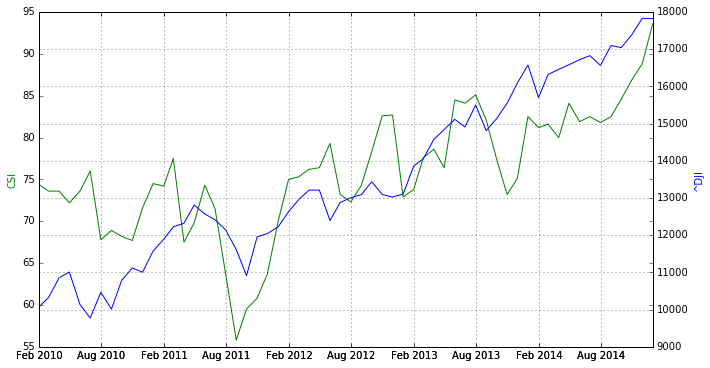

CSI and ^DJI Correlation Coefficient: 0.7374912097318327


In [19]:
%matplotlib inline

import pandas as pd
import datetime, pylab, quandl
import matplotlib.pyplot as plt
import numpy as np

pylab.rcParams['figure.figsize'] = (11,6)


#grabbing data

s = datetime.datetime(2010, 1,1)
e = datetime.datetime(2015, 1, 1)

dow = quandl.get("YAHOO/INDEX_DJI", authtoken="zo7kqTM5GbbuJUNsTKVa", 
                 start_date=s, end_date=e, collapse='monthly')

csi = quandl.get("UMICH/SOC1", authtoken="zo7kqTM5GbbuJUNsTKVa", 
                 start_date=s, end_date=e)
                 
df = pd.DataFrame({'^DJI': dow['Adjusted Close'], 'CSI': csi['Index']})

x = df['^DJI'] 
y = df['CSI']


#first plot

fig = pylab.figure()

ax1 = fig.add_subplot(111)
ax1.set_ylabel('CSI', color='g')
line1 = ax1.plot(y, 'g')

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('^DJI', color='b')
line2 = ax2.plot(x, 'b')

plt.grid()

pylab.show()


#correlation

print('CSI and ^DJI Correlation Coefficient: {}'.format(np.corrcoef(x,y)[0,1]))


As you can see they are generally correlated _but_ there is a degree of error that comes from heuristical judgement. We can measure the error with volatility...

per [Investopedia](http://www.investopedia.com/terms/v/volatility.asp) - 

>_Volatility is a statistical measure of the dispersion of returns for a given security or market index. Volatility can either be measured by using the standard deviation or variance between returns from that same security or market index. Commonly, the higher the volatility, the riskier the security._

Looking at variance as a measure of volatility, we're going to normalize the two indices by looking at the percent change from month to month.

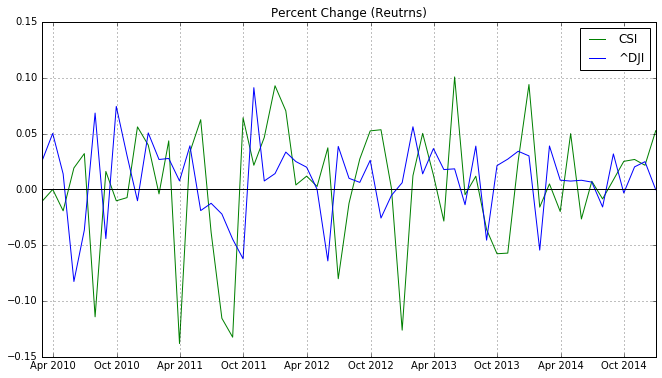

CSI to ^DJI variance Ratio: 2.444392250408519


In [23]:
%matplotlib inline

pylab.rcParams['figure.figsize'] = (11,6)


#normalizing data

pct_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1))).dropna()


#second plot

fig = pylab.figure()

ax1 = fig.add_subplot(111)
line1 = ax1.plot(pct_change['CSI'], color='g', label='CSI')

ax2 = fig.add_subplot(111)
line2 = ax2.plot(pct_change['^DJI'], color='b', label='^DJI')

plt.axhline(y=0, color='black')
plt.legend()
plt.grid()
plt.title('Percent Change (Reutrns)')

pylab.show()


#variance ratio

print('CSI to ^DJI variance Ratio: {}'.format(np.var(pct_change['CSI'])/np.var(pct_change['^DJI'])))

In other words, the CSI is nearly two and a half times more volatile, that is, two and a half times more responsive to market effects than our benchmark, the Dow Jones Industrial Average. When making a big decision, we won't want to change plans at every small dip and spike. Investing in a security based purely off of heuristical judgment would be very risky.